In [7]:
# CREATE SYNTHETIC ILLUSTRATION OF ITERATIVE DETERMINISTIC SMOOTHING

import numpy as np
import matplotlib . pyplot as plt
plt.rcParams['figure.dpi'] = 100  # make plots bigger

In [2]:
nx = 100
np.random.seed(100)
x = np.linspace (-1,1,nx)
dx = x[1] - x[0]

# noisy initial signal
#y = 0.5 * (1 - (x < -0.25).astype('float') - (x > 0.25).astype('float'))
y = np.linspace (-1,1,nx)
y[:40] = -1
y[40:60] = (1/0.2)*x[40:60]
y[60:] = 1.0
yn = y
yn[30:40]=1.0
yn[40:45]=-1
yn[45:52]=1.0
yn[52:58]=-1
yn[58:60]=1.0
yn[60:63]=-1
yn[63:66]=1.0
yn[66:70]=-1

In [3]:
# recuded data plotting
red_nx = 20
red_x = np.linspace (-1,1,red_nx)

# noisy initial signal
#y = 0.5 * (1 - (x < -0.25).astype('float') - (x > 0.25).astype('float'))
red_y = np.linspace (-1,1,red_nx)
red_y[:10] = -1
red_y[10:] = 1

In [4]:
# second-derivative matrix
# make matrix D
D = np.zeros((nx,nx))
for i in range (nx):
    for j in range (nx):
        if i == j:
            D[i ,j] = -1
        elif j == i + 1:
            D[i ,j] = 1
D = (1/dx)*D

In [5]:
# define the derivative
def dJ (u , u0, lam=0.1) :
    return 2*(u - u0 + lam *( np.transpose(D) @ D @ u))

# define the gradient descent algorithm
def grad_desc (u0,lam=0.1):
    #epsilon = 1e-6
    k = 1
    max_iter = 100
    dt = ( dx ** 2) / 2 # step - size rule
    u = u0
    while k < max_iter :
        # enforce boundary conditions
        u[0]=-1
        u[-1] = 1
        
        # do the thang!
        u_new = u - dt * dJ (u , u0, lam )
        norm = np.linalg.norm( u_new - u)
        u = u_new
        k += 1
    u[0]=-1
    u[-1] = 1
    return u


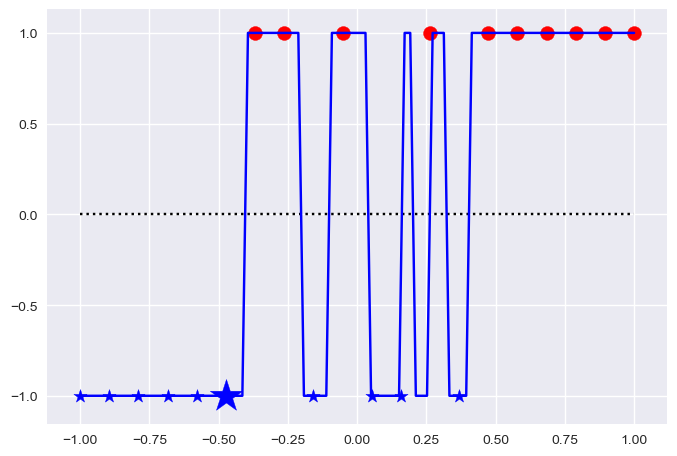

In [13]:
with plt.style.context('seaborn'):
    plt.plot(x,yn,'b-')#,label='$f^0=f$')
    plt.hlines(0.0,-1,1,'k',linestyles='dotted')
    
    plt.scatter(red_x[:5],-1*np.ones(5),marker='*',c='b',s=100)
    plt.scatter(red_x[5],-1,marker='*',c='b',s=600)
    plt.scatter(red_x[6:8], np.ones(2),marker='o',c='r',s=100)
    plt.scatter(red_x[8], -1,marker='*',c='b',s=100)
    plt.scatter(red_x[9], 1,marker='o',c='r',s=100)
    
    plt.scatter(red_x[10],-1,marker='*',c='b',s=100)
    plt.scatter(red_x[11],-1,marker='*',c='b',s=100)
    plt.scatter(red_x[12], 1,marker='o',c='r',s=100)
    plt.scatter(red_x[13],-1,marker='*',c='b',s=100)
    plt.scatter(red_x[14:],red_y[14:],marker='o',c='r',s=100)
    
    #plt.text(-1,0.08,'$p=0.5$',size=12)
    #plt.legend(prop={'size': 15})
    xmin, xmax, ymin, ymax = plt.axis()
    #print(ymin, ymax)
    plt.savefig("avingfig_init.png",bbox_inches='tight')
    plt.show()

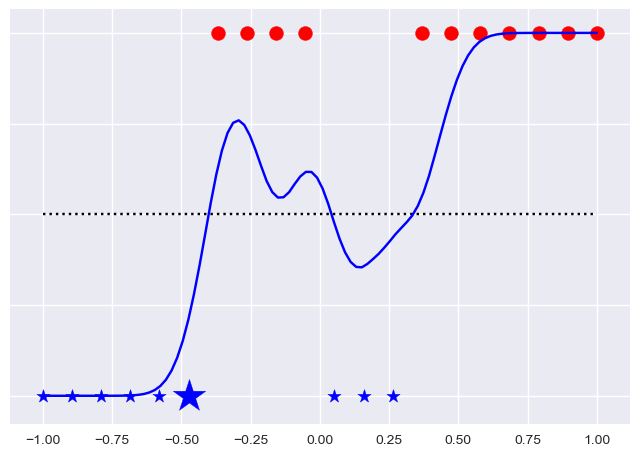

In [14]:
with plt.style.context('seaborn'):
    #plt.plot(x,yn,'b-',label='$f^0$')
    plt.hlines(0,-1,1,'k',linestyles='dotted')
    plt.scatter(red_x[:5],-1*np.ones(5),marker='*',c='b',s=100)
    plt.scatter(red_x[5],-1,marker='*',c='b',s=600)
    plt.scatter(red_x[6:10],np.ones(4),marker='o',c='r',s=100)
    plt.scatter(red_x[10:13],-1*np.ones(3),marker='*',c='b',s=100)
    plt.scatter(red_x[13:],red_y[13:],marker='o',c='r',s=100)
    #plt.text(-1,0.52,'$p=0.5$', size=12)
    
    u = grad_desc(yn)
    plt.plot(x,u,'b-')#,label='$f^1$')
    
    plt.ylim(ymin, ymax)
    plt.gca().axes.yaxis.set_ticklabels([])
    #plt.legend(prop={'size': 15})
    plt.savefig("avingfig_step1.png",bbox_inches='tight')
    
    plt.show()

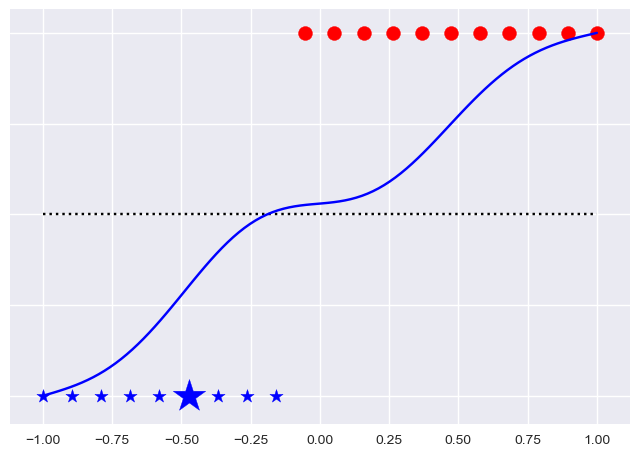

In [15]:
u = grad_desc(yn)
u = grad_desc(u)
#u = grad_desc(u)
#u = grad_desc(u)
#u = grad_desc(u)
u0=u
u = grad_desc(u)
u = grad_desc(u)
u = grad_desc(u)
u = grad_desc(u)
u = grad_desc(u)
u = grad_desc(u)

with plt.style.context('seaborn'):
    #plt.plot(x,u0,'b-',label='$f^k$')
    plt.hlines(0,-1,1,'k',linestyles='dotted')
    
    plt.scatter(red_x[:5],-1*np.ones(5),marker='*',c='b',s=100)
    plt.scatter(red_x[5],-1,marker='*',c='b',s=600)
    plt.scatter(red_x[6:9],red_y[6:9],marker='*',c='b',s=100)
    plt.scatter(red_x[9],1,marker='o',c='r',s=100)
    plt.scatter(red_x[10:],red_y[10:],marker='o',c='r',s=100)
    #plt.text(-1,0.52,'$p=0.5$',size=12)
    
    u = grad_desc(u)
    plt.plot(x,u,'b-')#,label='$f^{k}$')
    
    plt.ylim(ymin, ymax)
    plt.gca().axes.yaxis.set_ticklabels([])
    #plt.legend(prop={'size': 15})
    plt.savefig("avingfig_stepk.png",bbox_inches='tight')
    plt.show()